<a href="https://colab.research.google.com/github/romarkpaswan/Data-Science/blob/main/Speech_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd

In [62]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

Import Modules


In [63]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as Audio
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [64]:
dataset_path = '/content/drive/MyDrive/archive'
paths = []
labels = []
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]

        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [65]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

Create a dataframe

In [66]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
1,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
2,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
3,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
4,/content/drive/MyDrive/archive/TESS Toronto em...,disgust


In [67]:
df['label'].value_counts()

,count
label,
disgust,800
angry,800
sad,800
happy,800
fear,800
ps,800
neutral,800
angry (1),5
neutral (1),1


Exploratary Data Analysis

<Axes: xlabel='count', ylabel='label'>

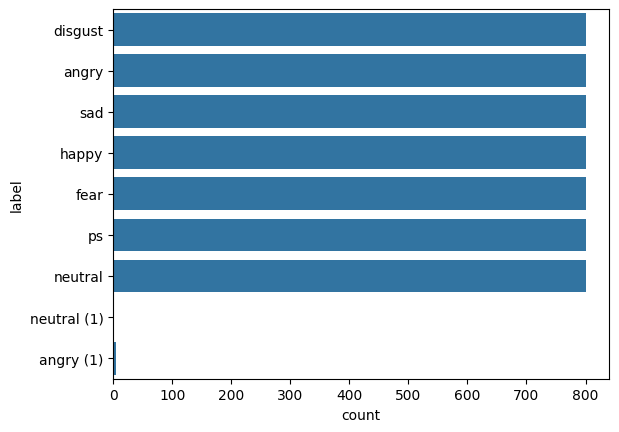

In [68]:
sns.countplot(df['label'])

In [69]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    #plt.show()



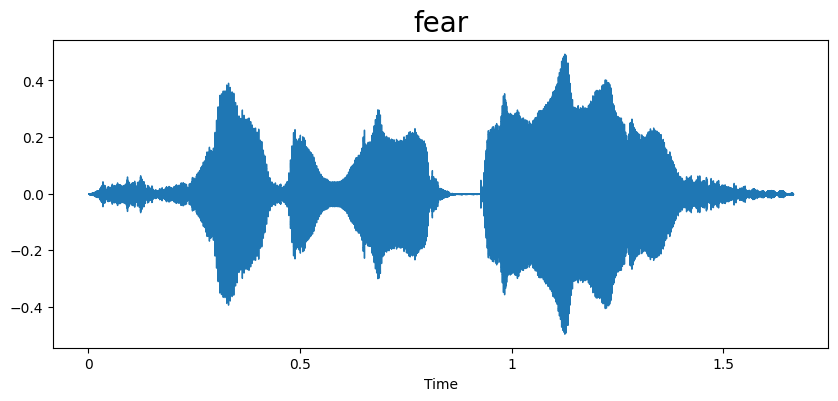

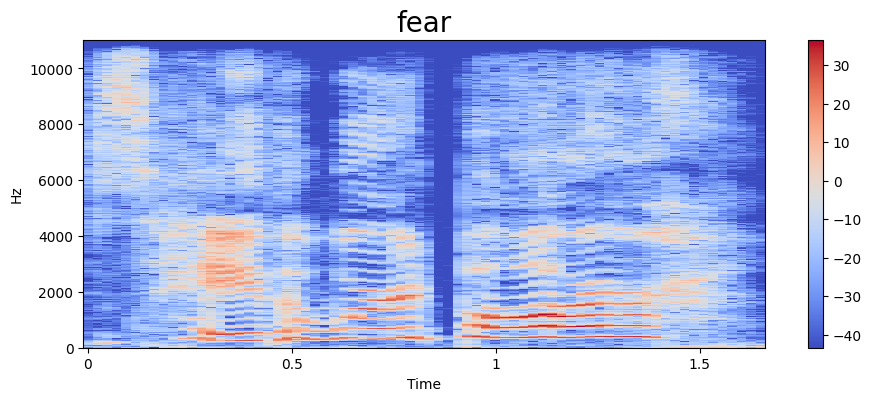

In [70]:
emotion = 'fear'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

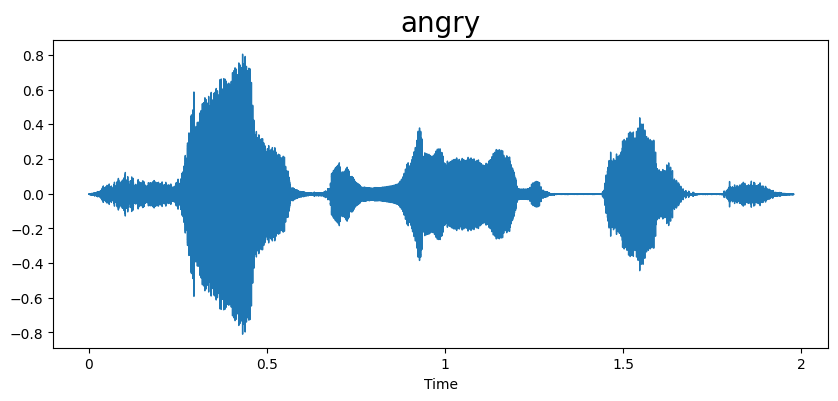

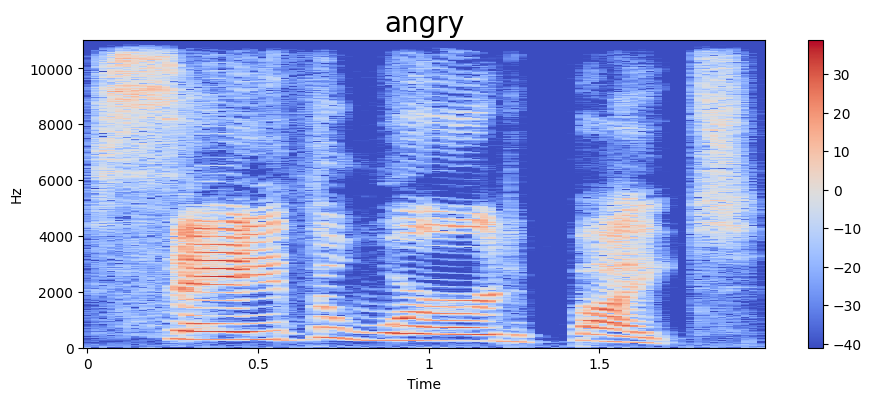

In [71]:
emotion = 'angry'
path = df['speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

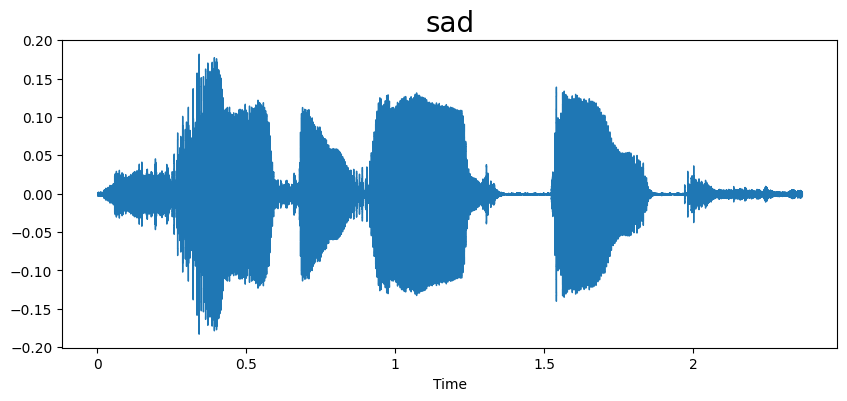

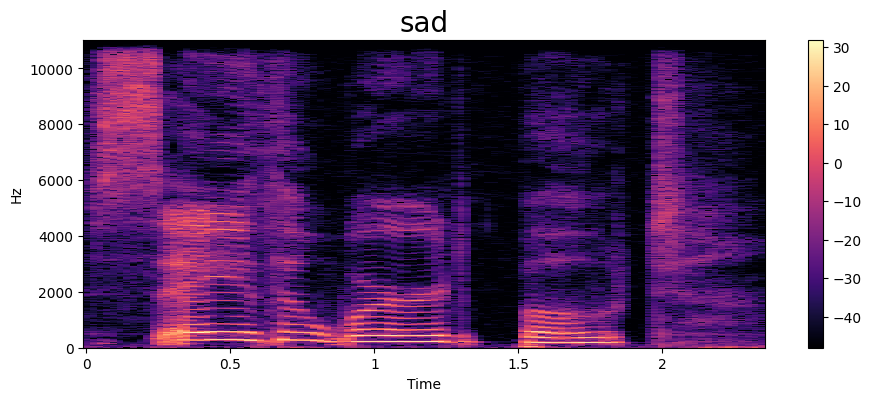

In [72]:
emotion = 'sad'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

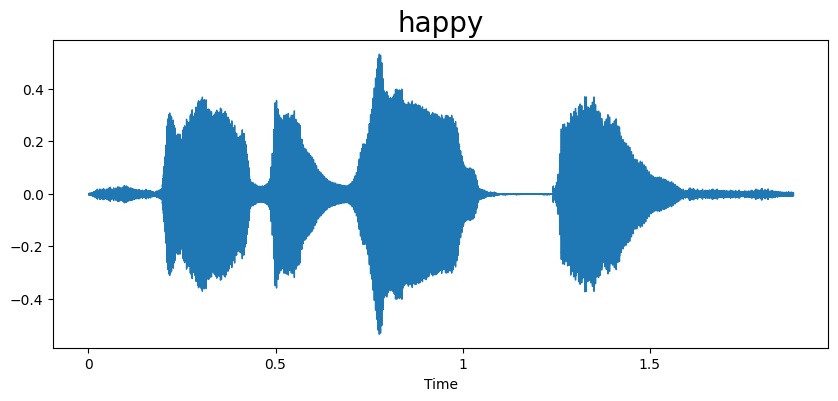

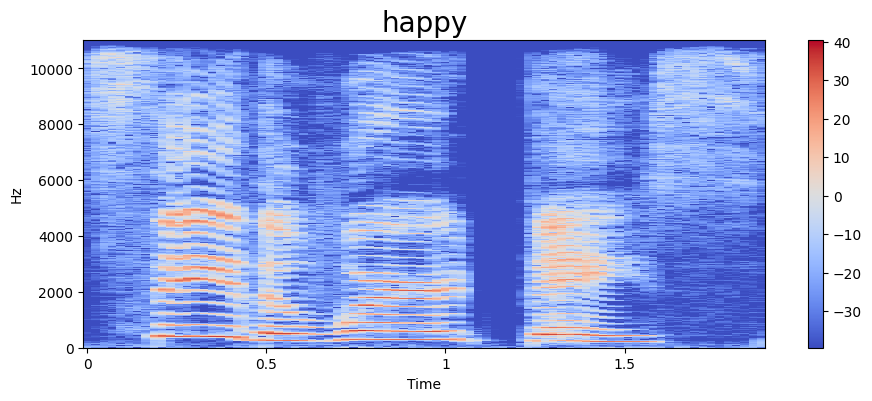

In [73]:
emotion = 'happy'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

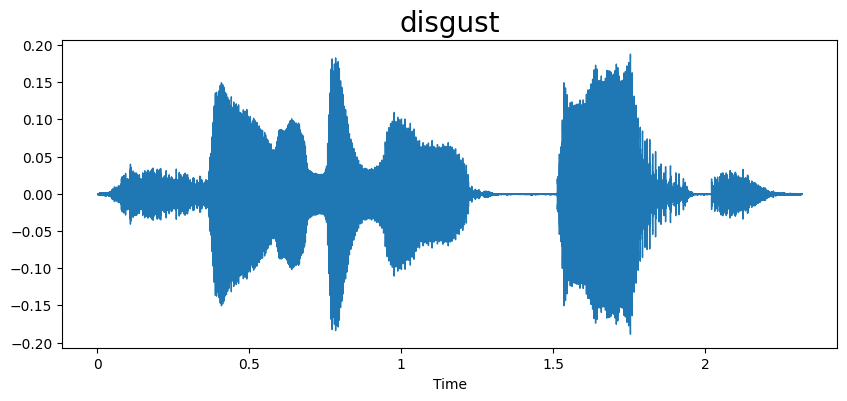

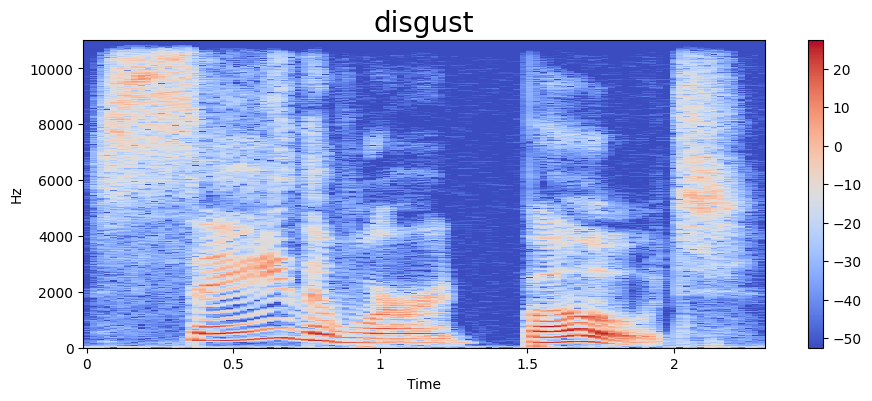

In [74]:
emotion = 'disgust'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

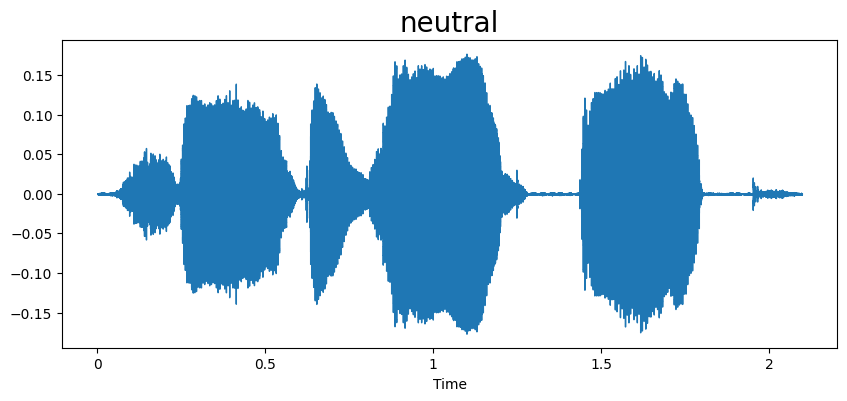

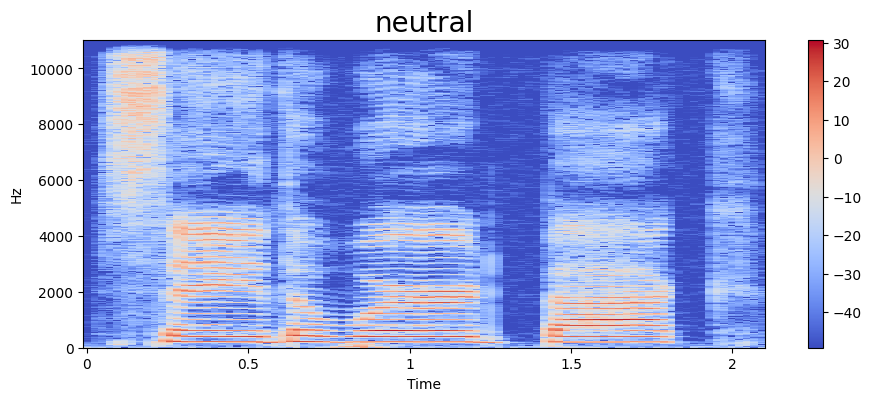

In [75]:
emotion = 'neutral'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

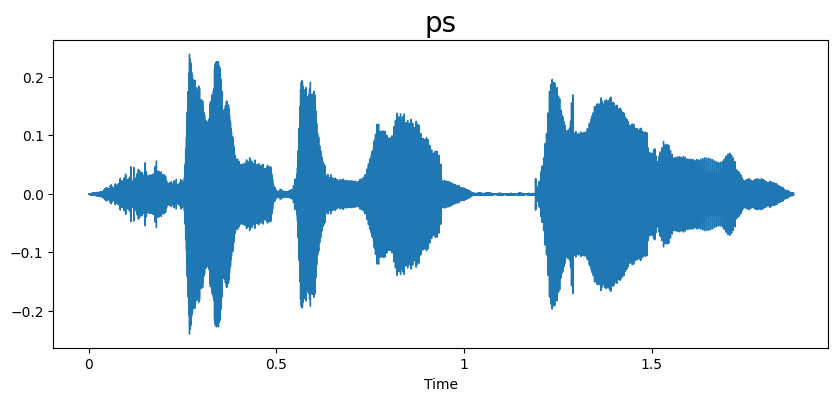

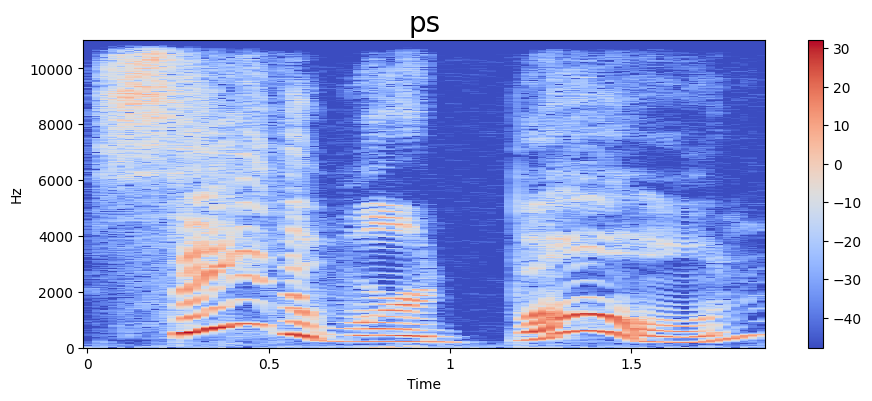

In [76]:
emotion = 'ps'
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio.Audio(path)

Feature Extraction

In [77]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [78]:
extract_mfcc(df['speech'][0])

array([-4.2064407e+02,  9.7250931e+01, -5.8227634e-01,  1.7940107e+01,
       -1.3912266e+01, -4.5460124e+00, -6.7650795e+00, -9.0733843e+00,
       -9.1889458e+00, -4.0450530e+00, -1.1367816e+01,  2.8339422e+00,
       -2.0045791e+00,  1.2298642e+00, -1.7541523e+00, -6.5558562e+00,
       -4.2858906e+00,  3.0584719e+00, -4.4824128e+00, -1.8189458e+00,
        2.5101690e+00,  5.7593107e-01, -3.4616089e+00,  4.8974862e+00,
       -2.1020253e+00,  2.4044783e+00, -4.5513147e-01,  1.8465831e+00,
       -1.4152129e+00,  2.1161504e+00, -4.8162432e+00,  5.6674819e+00,
        1.5131907e-01,  2.0916779e+00,  3.0895708e+00,  2.3847067e+00,
        5.2863421e+00,  3.7488871e+00,  3.5173147e+00,  4.8316412e+00],
      dtype=float32)

In [79]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [80]:
X_mfcc

,speech
0,"[-420.64407, 97.25093, -0.58227634, 17.940107,..."
1,"[-412.1714, 80.672745, -3.1582532, 23.655542, ..."
2,"[-443.24942, 64.684074, 13.261547, 25.564043, ..."
3,"[-440.4106, 122.641045, -8.854473, 20.866732, ..."
4,"[-445.5321, 99.39986, 3.3137274, 34.441322, 2...."
...,...
5601,"[-429.44836, 73.94441, 1.4091043, -5.2229295, ..."
5602,"[-402.59885, 61.828682, -8.522905, -3.3536038,..."
5603,"[-437.72104, 83.71466, -4.8147764, -13.024874,..."
5604,"[-428.4035, 65.69212, 5.564823, -1.1533782, 2...."


In [81]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5606, 40)

In [82]:
X = np.expand_dims(X, -1)
X.shape

(5606, 40, 1)

In [83]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [84]:
y = y.toarray()

In [85]:
y.shape

(5606, 9)

Creating the LSTM model

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,193 (301.54 KB)

 Trainable params: 77,193 (301.54 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [87]:
history = model.fit(X, y, validation_split=0.2, batch_size=512, epochs=100, shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.1703 - loss: 2.1378 - val_accuracy: 0.3369 - val_loss: 1.8643
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4495 - loss: 1.7460 - val_accuracy: 0.4376 - val_loss: 1.4096
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5542 - loss: 1.2895 - val_accuracy: 0.5588 - val_loss: 1.0127
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6248 - loss: 0.9514 - val_accuracy: 0.5891 - val_loss: 0.8305
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7064 - loss: 0.7347 - val_accuracy: 0.6542 - val_loss: 0.7127
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8158 - loss: 0.5297 - val_accuracy: 0.6809 - val_loss: 0.7347
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8692 - loss: 0.4043 - val_accuracy: 0.7611 - val_loss: 0.5719
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8919 - loss: 0.3228 - val_accuracy: 0.8137 - val_loss:

In [94]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}, Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")


Final Training Accuracy: 0.9975, Final Validation Accuracy: 0.9875


Ploting the result

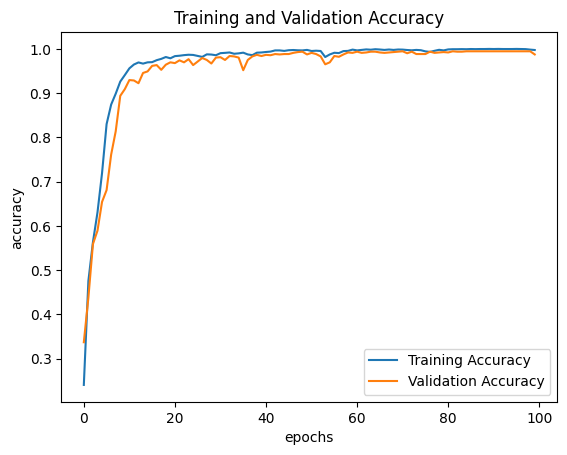

<Figure size 640x480 with 0 Axes>

In [91]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

plt.show()

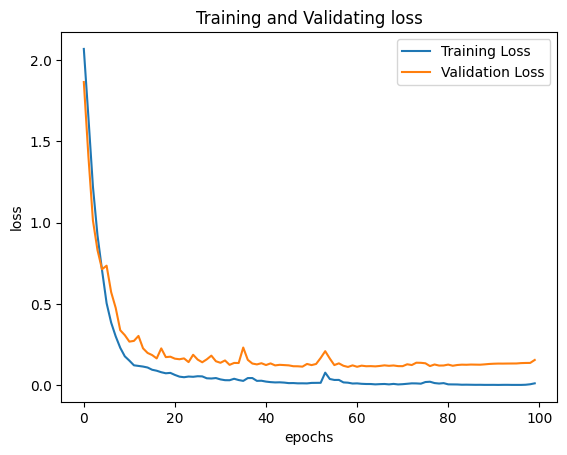

<Figure size 640x480 with 0 Axes>

In [93]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validating loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.show()